In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from pathlib import Path
from sklearn.model_selection import train_test_split


In [2]:
# training data location
dir_ = Path('Portrait')
filepaths = list(dir_.glob(r'**/*.jpg'))

# labeling
def proc_img(filepath):
    labels = [str(filepath[i]).split("\\")[-1].split("_")[0] for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # 경로와 라벨 concatenate
    df = pd.concat([filepath, labels], axis=1)

    # index 재설정
    df = df.sample(frac=1,random_state=0).reset_index(drop = True)
    
    return df

In [4]:
df = proc_img(filepaths)
df

,Filepath,Label
0,Portrait\Son_4.jpg,Son
1,Portrait\Obama_5.jpg,Obama
2,Portrait\Obama_10.jpg,Obama
3,Portrait\Son_3.jpg,Son
4,Portrait\Obama_7.jpg,Obama
5,Portrait\Obama_1.jpg,Obama
6,Portrait\ElonMusk_5.jpg,ElonMusk
7,Portrait\ElonMusk_11.jpg,ElonMusk
8,Portrait\ElonMusk_6.jpg,ElonMusk
9,Portrait\Son_2.jpg,Son


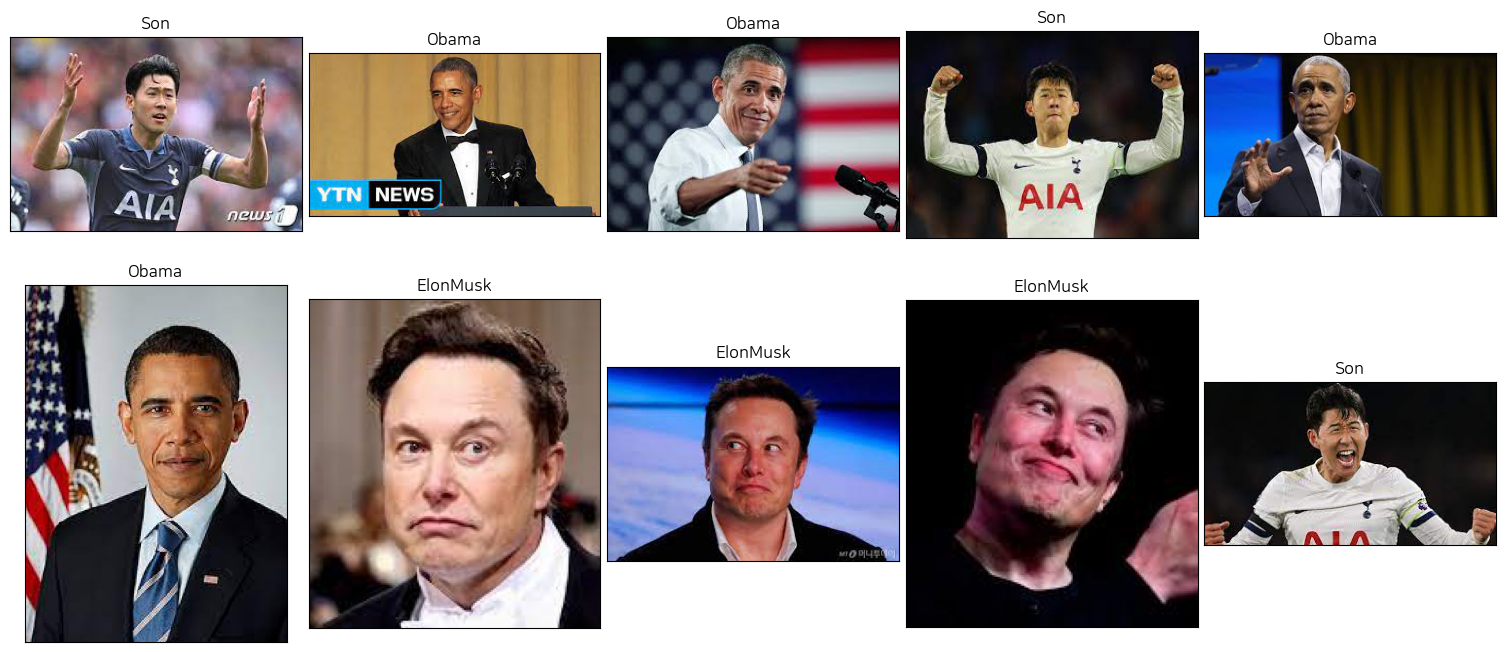

In [5]:
# 데이터 확인
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df.Filepath[i]))
    ax.set_title(df.Label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

In [6]:
train_df,test_df = train_test_split(df, test_size=0.1,random_state=0)
train_df.shape,test_df.shape

((31, 2), (4, 2))

In [7]:
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[150, 150, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(units=8, activation='softmax'))

# Compiling the CNN
cnn.compile(optimizer = 'adam', 
            loss = 'categorical_crossentropy', 
            metrics = ['accuracy'])
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 41472)             0         
                                                                 
 dense (Dense)               (None, 128)               5

In [24]:
cnn.fit(x = train_df, validation_data=test_df, epochs = 10)

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [25]:
# TODO: 
# 여러 인물의 데이터 확보
# 학습 가능한 데이터로 전처리(Label은 OneHotEncoding, Data는 랜드마크(?))
# 딥러닝 모델(CNN) 구축
# 데이터 증강(Data Augmentation)

In [13]:
# # augmentation은 일단 생략할 것
# import numpy as np
# import tensorflow as tf


# from keras.preprocessing.image import ImageDataGenerator

# train_datagen = ImageDataGenerator(rescale = 1./255,
#                                    validation_split=0.2)

# train_gen = train_datagen.flow_from_directory('C:/Users/js2-3/Desktop/Github/Desktop_sync/Projects/Communication_Assistant/VideoCall/Portrait',
#                                                  target_size = (150, 150),
#                                                  batch_size = 32,
#                                                  class_mode = 'categorical',subset='training')
# val_gen  = train_datagen.flow_from_directory('C:/Users/js2-3/Desktop/Github/Desktop_sync/Projects/Communication_Assistant/VideoCall/Portrait',
#                                                  target_size = (150, 150),
#                                                  batch_size = 32,
#                                                  class_mode = 'categorical',subset='validation')

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
